# Exploratory Data Analysis


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Creating a dataframe from the ais_train.csv file
ais_train = pd.read_csv('ais_train.csv', sep='|')
print(ais_train.head())

# Creating a dataframe from the ports.csv file
ports = pd.read_csv('ports.csv', sep='|')
print(ports.head())

# Creating a dataframe from the vessels.csv file
vessels = pd.read_csv('vessels.csv', sep='|')
print(vessels.head())

                  time    cog   sog  rot  heading  navstat       etaRaw  \
0  2024-01-01 00:00:25  284.0   0.7    0       88        0  01-09 23:00   
1  2024-01-01 00:00:36  109.6   0.0   -6      347        1  12-29 20:00   
2  2024-01-01 00:01:45  111.0  11.0    0      112        0  01-02 09:00   
3  2024-01-01 00:03:11   96.4   0.0    0      142        1  12-31 20:00   
4  2024-01-01 00:03:51  214.0  19.7    0      215        0  01-25 12:00   

   latitude  longitude                  vesselId                    portId  
0 -34.74370  -57.85130  61e9f3a8b937134a3c4bfdf7  61d371c43aeaecc07011a37f  
1   8.89440  -79.47939  61e9f3d4b937134a3c4bff1f  634c4de270937fc01c3a7689  
2  39.19065  -76.47567  61e9f436b937134a3c4c0131  61d3847bb7b7526e1adf3d19  
3 -34.41189  151.02067  61e9f3b4b937134a3c4bfe77  61d36f770a1807568ff9a126  
4  35.88379   -5.91636  61e9f41bb937134a3c4c0087  634c4de270937fc01c3a74f3  
                     portId               name portLocation   longitude  \
0  61d36ed80

## Initial exploration
### Checking for missing values

- ais_train: missing a lot of portIDs
- ports: no missing values
- vessels: a lot of missing values (only complete are shippingLineID, vesselID, CEU, GT, length and year)

In [3]:
ais_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522065 entries, 0 to 1522064
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   time       1522065 non-null  object 
 1   cog        1522065 non-null  float64
 2   sog        1522065 non-null  float64
 3   rot        1522065 non-null  int64  
 4   heading    1522065 non-null  int64  
 5   navstat    1522065 non-null  int64  
 6   etaRaw     1522065 non-null  object 
 7   latitude   1522065 non-null  float64
 8   longitude  1522065 non-null  float64
 9   vesselId   1522065 non-null  object 
 10  portId     1520450 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 127.7+ MB


In [4]:
ports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portId        1329 non-null   object 
 1   name          1329 non-null   object 
 2   portLocation  1329 non-null   object 
 3   longitude     1329 non-null   float64
 4   latitude      1329 non-null   float64
 5   UN_LOCODE     1329 non-null   object 
 6   countryName   1329 non-null   object 
 7   ISO           1329 non-null   object 
dtypes: float64(2), object(6)
memory usage: 83.2+ KB


In [5]:
vessels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   shippingLineId  711 non-null    object 
 1   vesselId        711 non-null    object 
 2   CEU             711 non-null    int64  
 3   DWT             703 non-null    float64
 4   GT              711 non-null    int64  
 5   NT              187 non-null    float64
 6   vesselType      699 non-null    float64
 7   breadth         703 non-null    float64
 8   depth           242 non-null    float64
 9   draft           10 non-null     float64
 10  enginePower     691 non-null    float64
 11  freshWater      221 non-null    float64
 12  fuel            221 non-null    float64
 13  homePort        573 non-null    object 
 14  length          711 non-null    float64
 15  maxHeight       35 non-null     float64
 16  maxSpeed        213 non-null    float64
 17  maxWidth        35 non-null     flo

### Finding outliers 
- ais_train: 

In [6]:
ais_train.describe()

,cog,sog,rot,heading,navstat,latitude,longitude
count,1.522065e+06,1.522065e+06,1.522065e+06,1.522065e+06,1.522065e+06,1.522065e+06,1.522065e+06
mean,1.782494e+02,6.331703e+00,5.054561e-01,1.762737e+02,2.092604e+00,3.658497e+01,1.153646e+01
std,1.076785e+02,7.539364e+00,1.760916e+01,1.070860e+02,2.411965e+00,2.290488e+01,6.871572e+01
min,0.000000e+00,0.000000e+00,-1.270000e+02,0.000000e+00,0.000000e+00,-4.753287e+01,-1.675409e+02
25%,7.820000e+01,0.000000e+00,0.000000e+00,7.500000e+01,0.000000e+00,3.451683e+01,-5.212810e+00
50%,1.838000e+02,5.000000e-01,0.000000e+00,1.800000e+02,0.000000e+00,4.223370e+01,4.234350e+00
75%,2.690000e+02,1.410000e+01,0.000000e+00,2.650000e+02,5.000000e+00,5.135197e+01,1.883715e+01
max,3.600000e+02,1.023000e+02,1.280000e+02,5.110000e+02,1.500000e+01,7.055720e+01,1.788054e+02


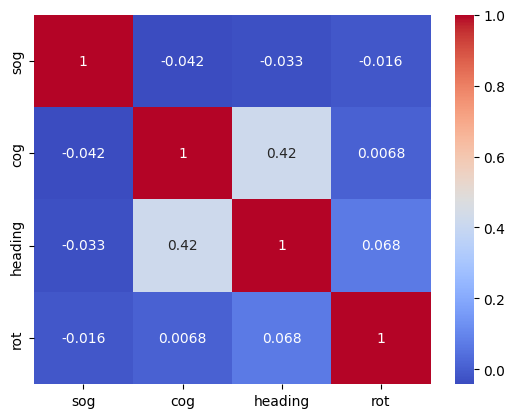

In [7]:
# Heatmap for correlation between 'sog', 'cog', 'heading', and 'rot'
sns.heatmap(ais_train[['sog', 'cog', 'heading', 'rot']].corr(), annot=True, cmap='coolwarm')
plt.show()

#### SOG

In [8]:
# IQR for 'sog' (Speed Over Ground)
Q1 = ais_train['sog'].quantile(0.25)
Q3 = ais_train['sog'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ais_train[(ais_train['sog'] < lower_bound) | (ais_train['sog'] > upper_bound)]
print(outliers)

# Print the unique vesselIDs of the outliers
unique_vessel_ids = outliers['vesselId'].unique()
print("Unique vesselIDs of the outliers:", unique_vessel_ids)


                        time    cog    sog  rot  heading  navstat  \
11660    2024-01-02 00:38:22  360.0  102.3    0      356        1   
64625    2024-01-06 13:39:05  360.0  102.3    5       60        0   
64755    2024-01-06 13:58:04  360.0  102.3    0       63        0   
64867    2024-01-06 14:02:25  360.0  102.3   10       62        0   
78470    2024-01-07 20:18:18  360.0  102.3    0      155        0   
...                      ...    ...    ...  ...      ...      ...   
1508239  2024-05-06 21:26:16  360.0  102.3    8      218        0   
1510755  2024-05-07 02:36:23  360.0  102.3    8      205        0   
1511339  2024-05-07 03:58:11  360.0  102.3    5      203        0   
1513322  2024-05-07 08:17:35  360.0  102.3    8      217        0   
1521950  2024-05-07 23:57:37  360.0  102.3    0      203        0   

              etaRaw  latitude  longitude                   vesselId  \
11660    12-28 23:00  40.95006   28.86656   61e9f446b937134a3c4c01ab   
64625    01-07 11:00  55.43

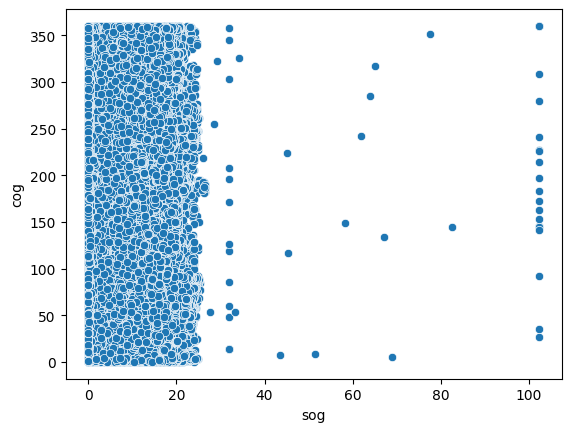

In [9]:

# Scatter plot for 'SOG' vs 'COG'
sns.scatterplot(x=ais_train['sog'], y=ais_train['cog'])
plt.show()


#### COG

In [10]:
# IQR for 'cog' (Course Over Ground)
Q1 = ais_train['cog'].quantile(0.25)
Q3 = ais_train['cog'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ais_train[(ais_train['cog'] < lower_bound) | (ais_train['cog'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [time, cog, sog, rot, heading, navstat, etaRaw, latitude, longitude, vesselId, portId]
Index: []


#### heading

In [11]:
# IQR for 'heading'
Q1 = ais_train['heading'].quantile(0.25)
Q3 = ais_train['heading'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ais_train[(ais_train['heading'] < lower_bound) | (ais_train['heading'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [time, cog, sog, rot, heading, navstat, etaRaw, latitude, longitude, vesselId, portId]
Index: []


#### Rate of turn

In [12]:
# IQR for 'rot' (Rotation)
Q1 = ais_train['rot'].quantile(0.25)
Q3 = ais_train['rot'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ais_train[(ais_train['rot'] < lower_bound) | (ais_train['rot'] > upper_bound)]
print(outliers)

                        time    cog   sog  rot  heading  navstat       etaRaw  \
1        2024-01-01 00:00:36  109.6   0.0   -6      347        1  12-29 20:00   
6        2024-01-01 00:05:40  123.4   0.0  128      511        5  12-16 01:00   
12       2024-01-01 00:08:55  194.4   7.8   23      206        0  12-31 23:59   
15       2024-01-01 00:10:31  236.9   0.1   -3      323        5  12-25 15:00   
16       2024-01-01 00:10:36  264.4   6.5  -19      266        0  01-16 01:00   
...                      ...    ...   ...  ...      ...      ...          ...   
1522048  2024-05-07 23:59:06   82.6   9.2   -5       75        0  05-07 21:20   
1522051  2024-05-07 23:59:07   93.7  17.9    5       94        0  05-09 01:00   
1522055  2024-05-07 23:59:07   25.1   2.8    2       22        0  05-12 01:00   
1522062  2024-05-07 23:59:08  269.8  14.9   -1      270        0  05-15 23:00   
1522064  2024-05-07 23:59:08  336.0  14.3    5      337        0  05-07 23:00   

         latitude  longitud

In [13]:
# Visualize the outliers for 'rot' (Rate of Turn)
sns.scatterplot(data=outliers, x='time', y='rot', hue='vesselId', palette='tab10')
plt.title('Outliers in Rate of Turn (ROT)')
plt.xlabel('Time')
plt.ylabel('Rate of Turn (ROT)')
plt.legend(title='Vessel ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


KeyboardInterrupt: 

In [14]:
# creating a dataframe for the vessel with vessleId 61e9f3a8b937134a3c4bfdf7
ais_train_vessel = ais_train[ais_train['vesselId'] == '61e9f3a8b937134a3c4bfdf7']
print(ais_train_vessel.head())

                     time    cog   sog  rot  heading  navstat       etaRaw  \
0     2024-01-01 00:00:25  284.0   0.7    0       88        0  01-09 23:00   
2672  2024-01-01 06:09:08   92.8  14.2    0       90        0  01-09 23:00   
2947  2024-01-01 06:38:19   90.5  14.3    0       88        0  01-09 23:00   
3093  2024-01-01 06:58:55   88.2  14.3    0       86        0  01-09 23:00   
3140  2024-01-01 07:15:56   88.3  12.3    0       86        0  01-09 23:00   

      latitude  longitude                  vesselId                    portId  
0    -34.74370  -57.85130  61e9f3a8b937134a3c4bfdf7  61d371c43aeaecc07011a37f  
2672 -35.16787  -56.77210  61e9f3a8b937134a3c4bfdf7  61d371c43aeaecc07011a37f  
2947 -35.16863  -56.63185  61e9f3a8b937134a3c4bfdf7  61d371c43aeaecc07011a37f  
3093 -35.16805  -56.53190  61e9f3a8b937134a3c4bfdf7  61d371c43aeaecc07011a37f  
3140 -35.16715  -56.45306  61e9f3a8b937134a3c4bfdf7  61d371c43aeaecc07011a37f  


## Time-Series Analysis

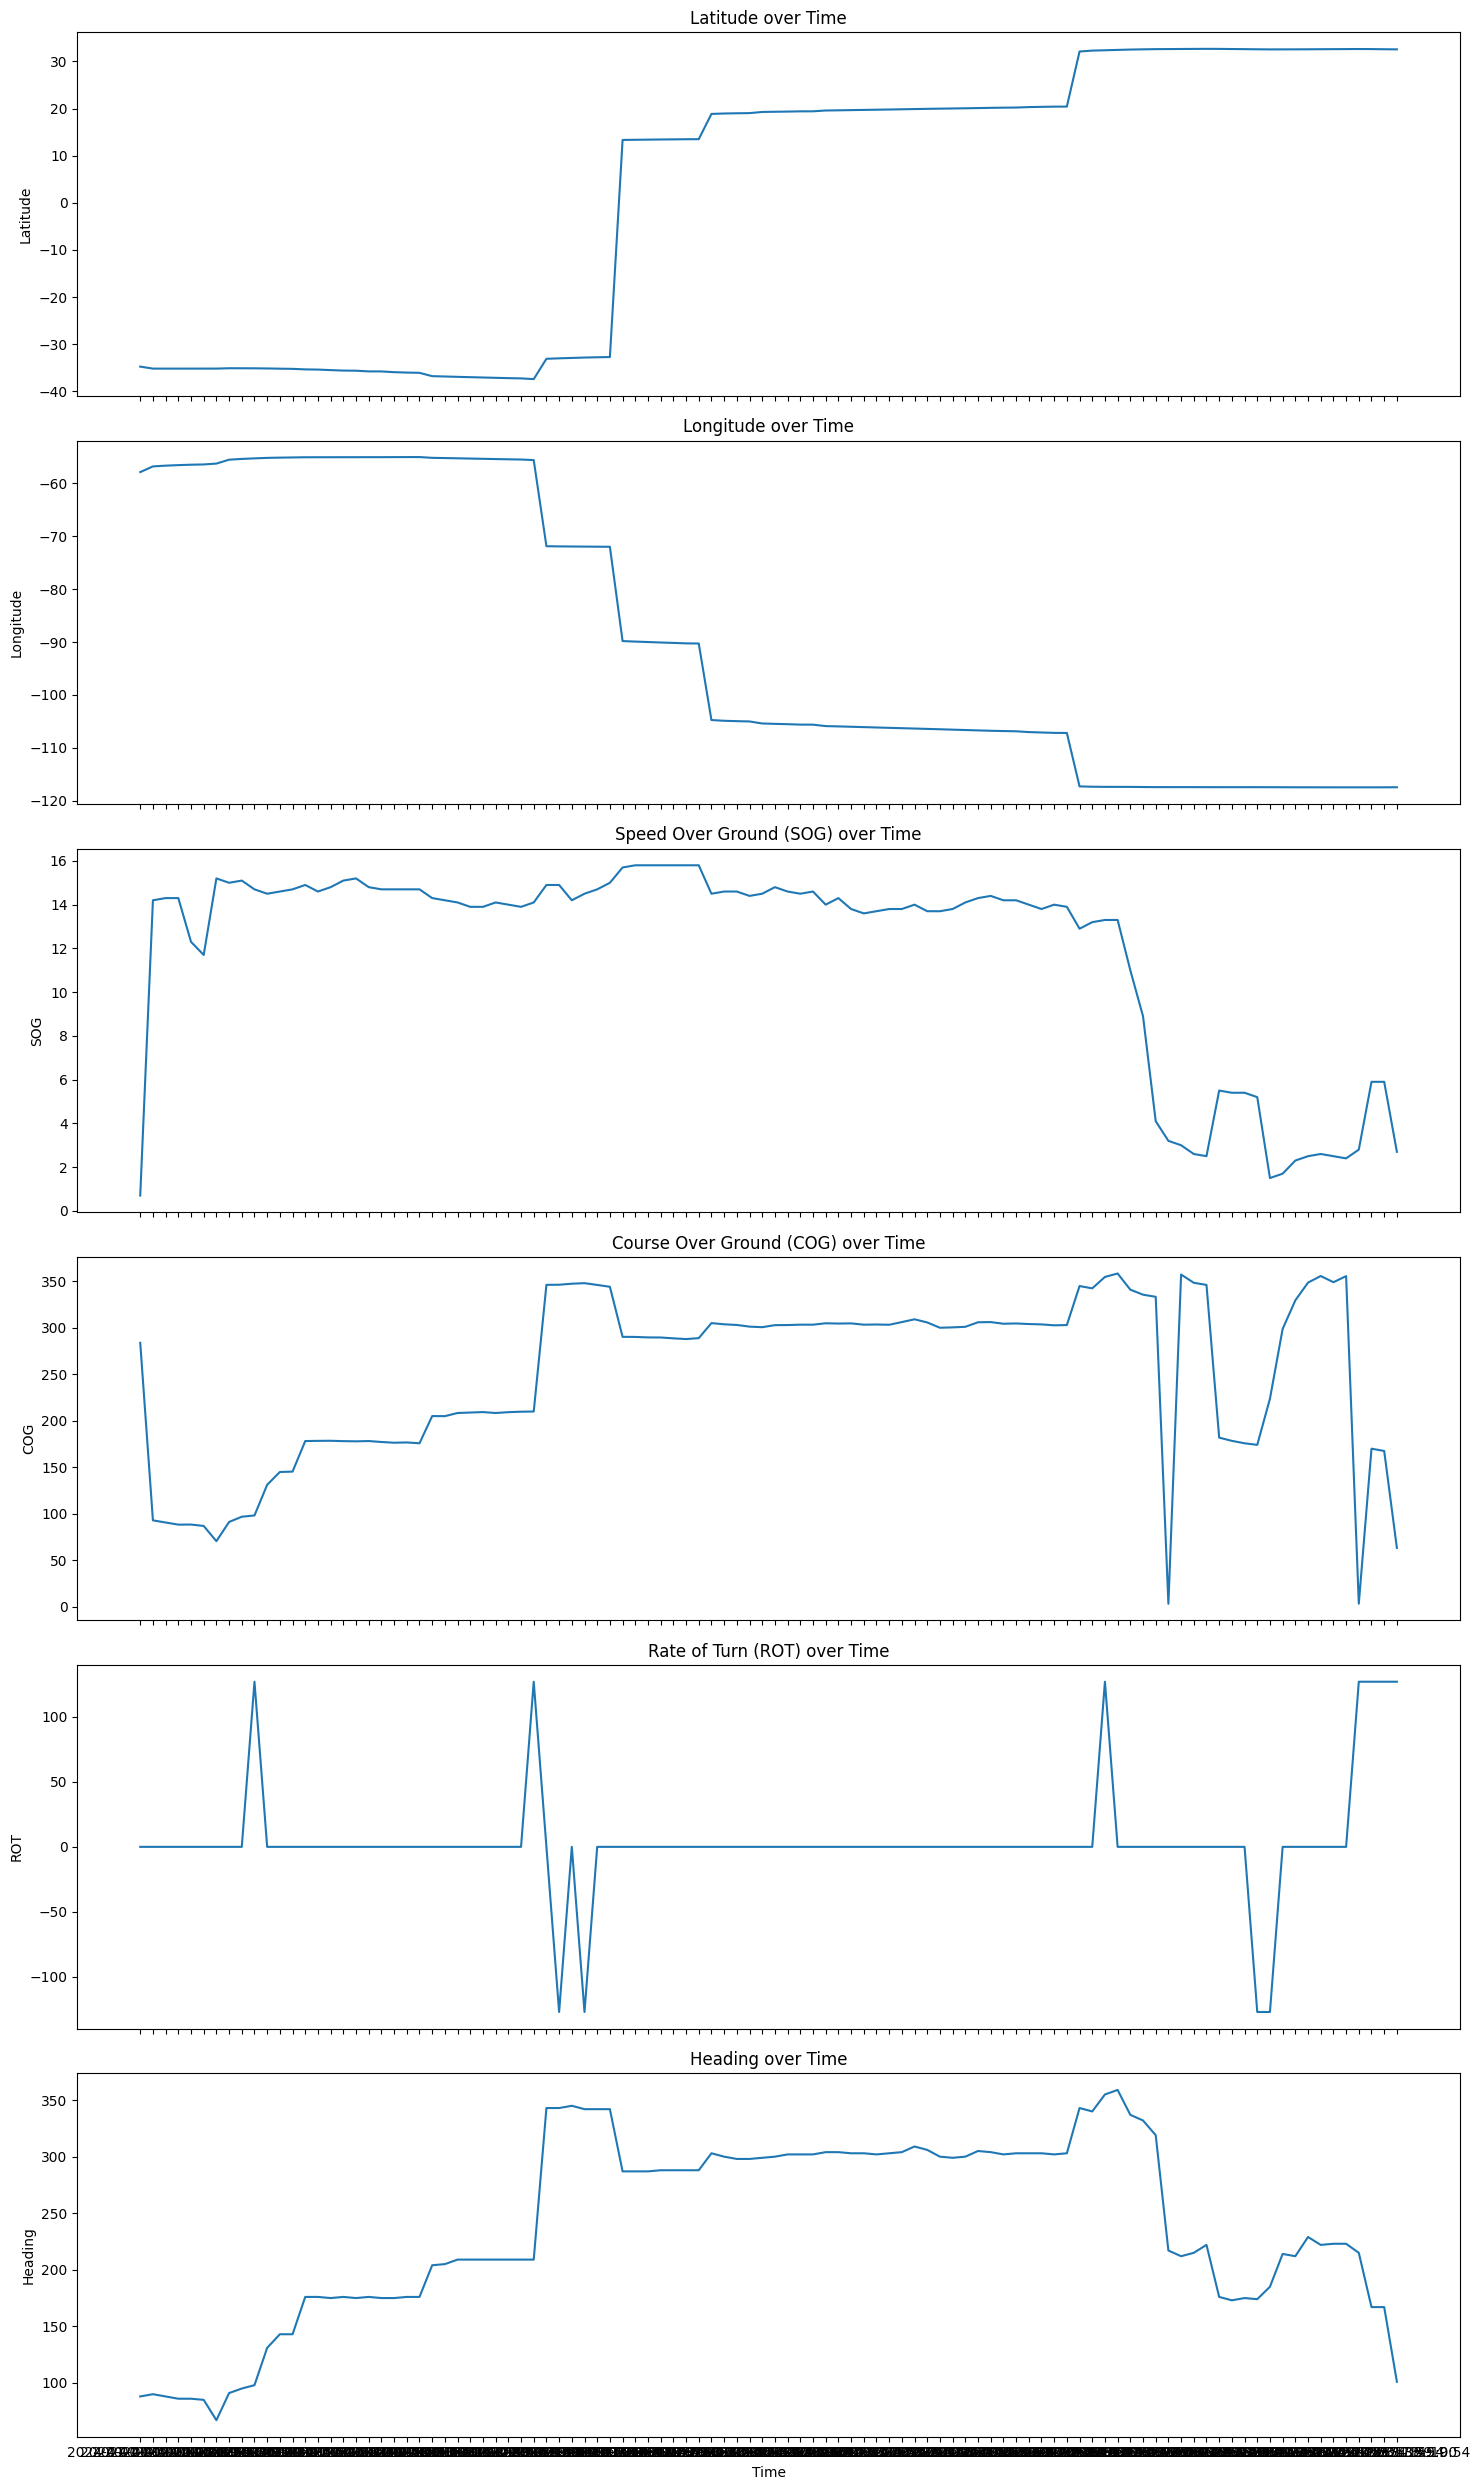

In [23]:
# Filter the dataframe to a smaller time frame, e.g., the first 100 entries
ais_train_vessel_small = ais_train_vessel.head(100)

# Plot time series for each vessel's latitude, longitude, SOG, COG, ROT, and HEADING
fig, axes = plt.subplots(6, 1, figsize=(15, 25), sharex=True)

# Plot latitude
sns.lineplot(data=ais_train_vessel_small, x='time', y='latitude', ax=axes[0])
axes[0].set_title('Latitude over Time')
axes[0].set_ylabel('Latitude')

# Plot longitude
sns.lineplot(data=ais_train_vessel_small, x='time', y='longitude', ax=axes[1])
axes[1].set_title('Longitude over Time')
axes[1].set_ylabel('Longitude')

# Plot SOG (Speed Over Ground)
sns.lineplot(data=ais_train_vessel_small, x='time', y='sog', ax=axes[2])
axes[2].set_title('Speed Over Ground (SOG) over Time')
axes[2].set_ylabel('SOG')

# Plot COG (Course Over Ground)
sns.lineplot(data=ais_train_vessel_small, x='time', y='cog', ax=axes[3])
axes[3].set_title('Course Over Ground (COG) over Time')
axes[3].set_ylabel('COG')

# Plot ROT (Rate of Turn)
sns.lineplot(data=ais_train_vessel_small, x='time', y='rot', ax=axes[4])
axes[4].set_title('Rate of Turn (ROT) over Time')
axes[4].set_ylabel('ROT')

# Plot Heading
sns.lineplot(data=ais_train_vessel_small, x='time', y='heading', ax=axes[5])
axes[5].set_title('Heading over Time')
axes[5].set_ylabel('Heading')

plt.xlabel('Time')
plt.tight_layout()
plt.show()

## Geospacial exploration

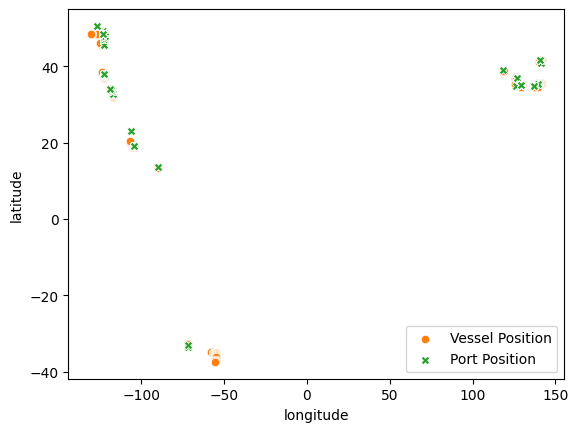

In [16]:
sns.scatterplot(data=ais_train_vessel, x='longitude', y='latitude')

# Merge ais_train_vessel with ports to get port longitude and latitude
merged_df = ais_train_vessel.merge(ports, on='portId', suffixes=('', '_port'))

# Plot the vessel positions and port positions
sns.scatterplot(data=merged_df, x='longitude', y='latitude', label='Vessel Position')
sns.scatterplot(data=merged_df, x='longitude_port', y='latitude_port', label='Port Position', marker='X')

plt.legend()
plt.show()

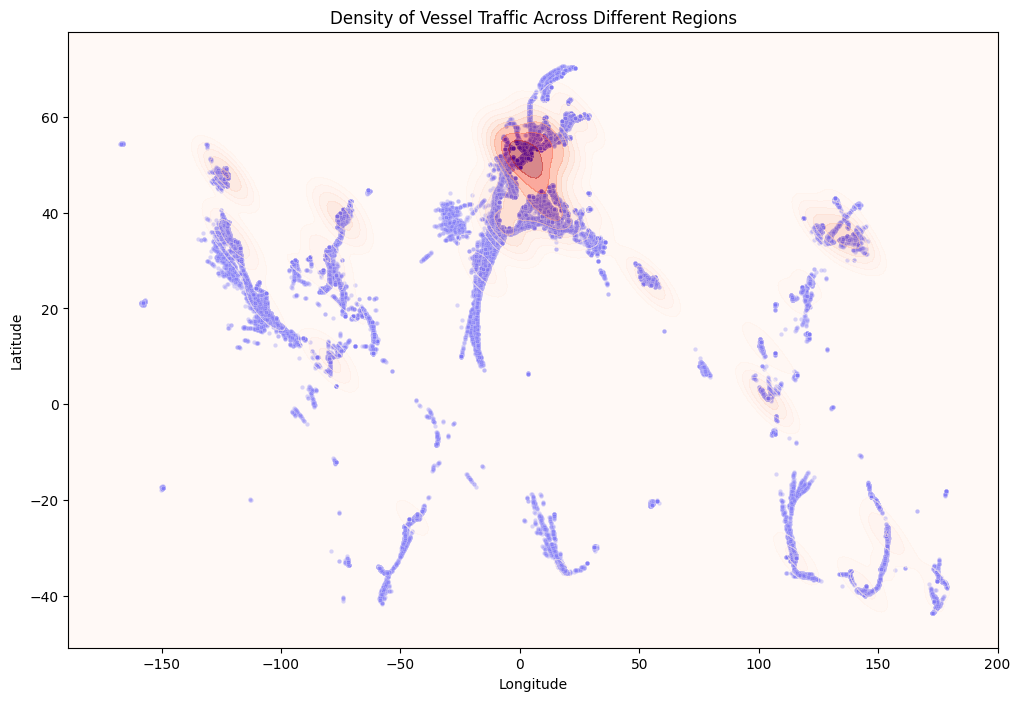

In [17]:
# Scatter plot with density overlay for vessel traffic
plt.figure(figsize=(12, 8))

# Sample the data to reduce the number of points plotted
sampled_data = ais_train.sample(frac=0.5, random_state=42)

# Scatter plot for vessel positions
sns.scatterplot(data=sampled_data, x='longitude', y='latitude', alpha=0.3, s=10, color='blue')

# Density plot overlay
sns.kdeplot(data=sampled_data, x='longitude', y='latitude', cmap='Reds', fill=True, alpha=0.5, thresh=0)

plt.title('Density of Vessel Traffic Across Different Regions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Categorical Data Analysis
### Vessels and ports

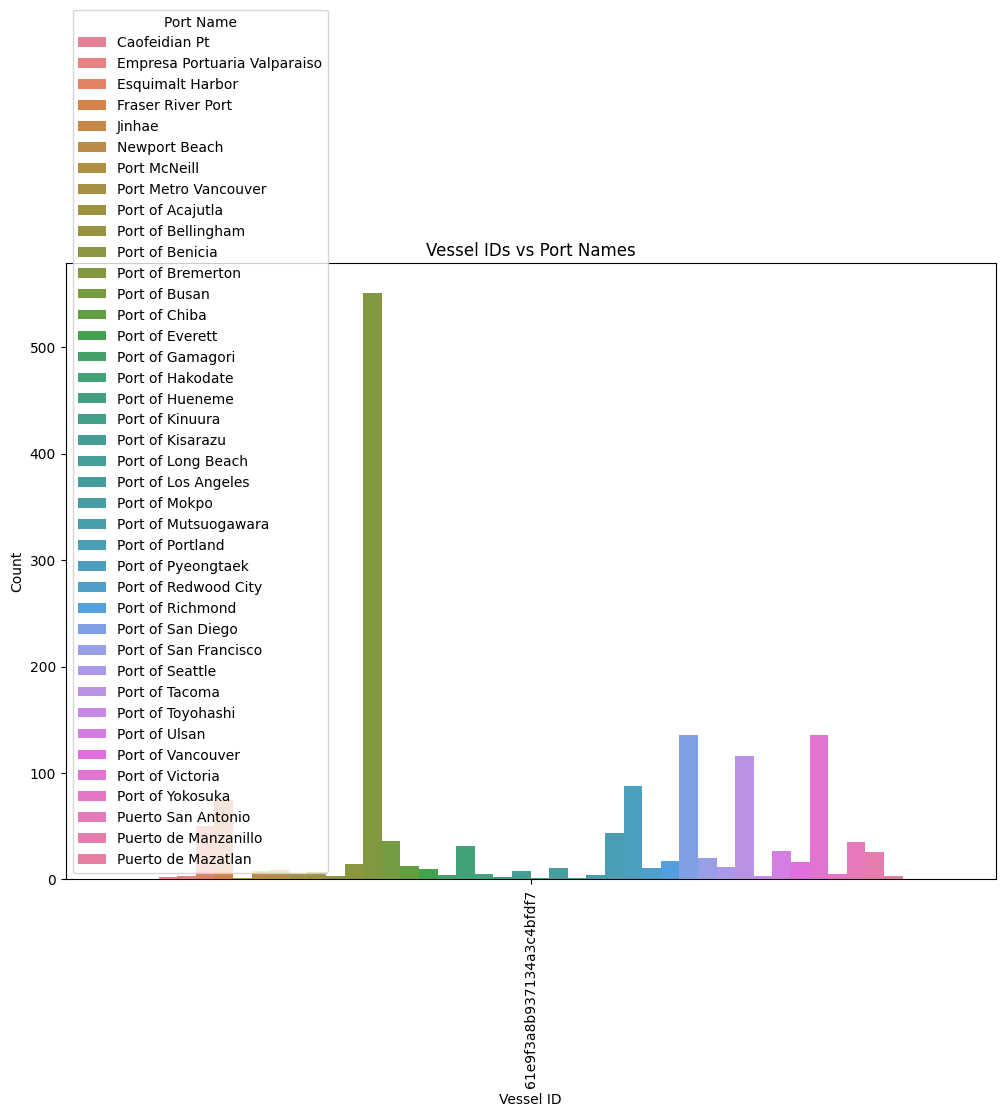

In [18]:
# Count the number of occurrences of each vesselId and port name combination
vessel_port_counts = merged_df.groupby(['vesselId', 'name']).size().reset_index(name='counts')

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=vessel_port_counts, x='vesselId', y='counts', hue='name')
plt.title('Vessel IDs vs Port Names')
plt.xlabel('Vessel ID')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Port Name')
plt.show()

In [19]:
# Check for unique categories in 'navstat'
unique_navstat = ais_train['navstat'].unique()
print("Unique categories in 'navstat':", unique_navstat)


# Check for unique categories in 'portName'
unique_portName = ports['name'].unique()
print("Unique categories in 'portName':", unique_portName)

# Check for unique categories in 'type'
unique_type = vessels['vesselType'].unique()
print("Unique categories in 'type':", unique_type)

Unique categories in 'navstat': [ 0  1  5 15  3  2  8 12 13  4  6 14 11  7  9]
Unique categories in 'portName': ['Port of Algiers' 'Port of Annaba' 'Port of Oran' ... 'Aquaba'
 'Port of Portbury' 'Bahrain Port']
Unique categories in 'type': [83. nan 21. 14.]


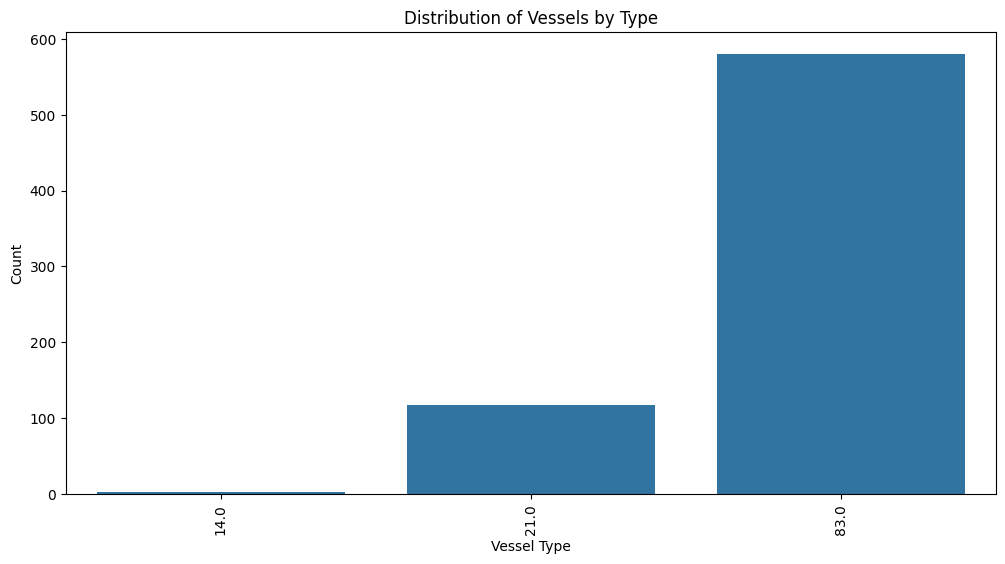

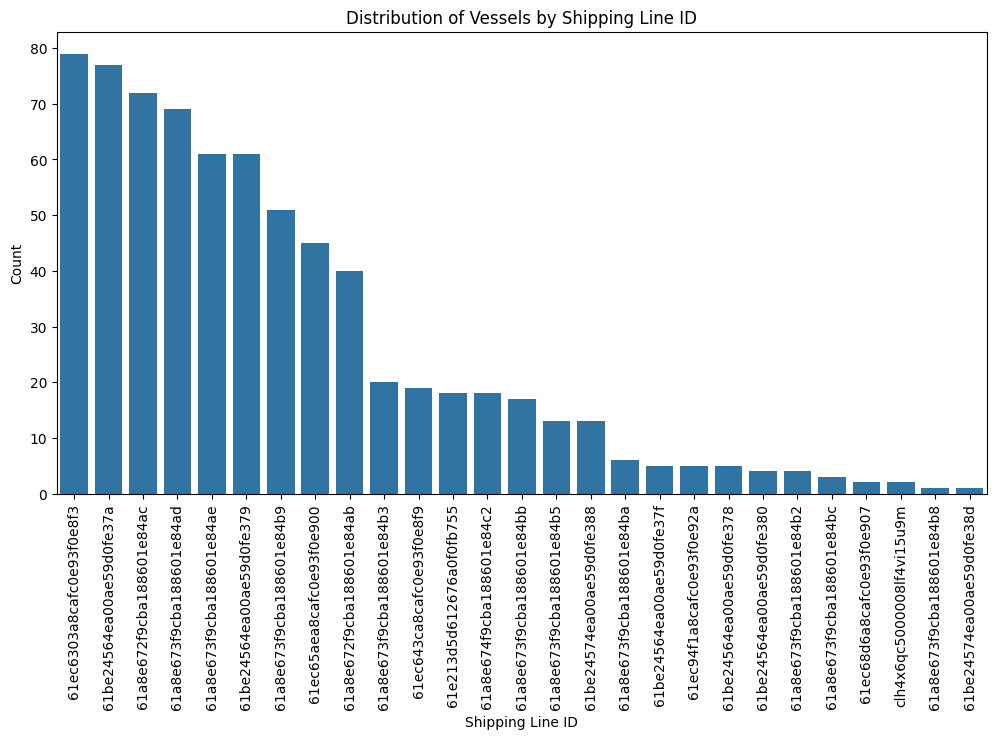

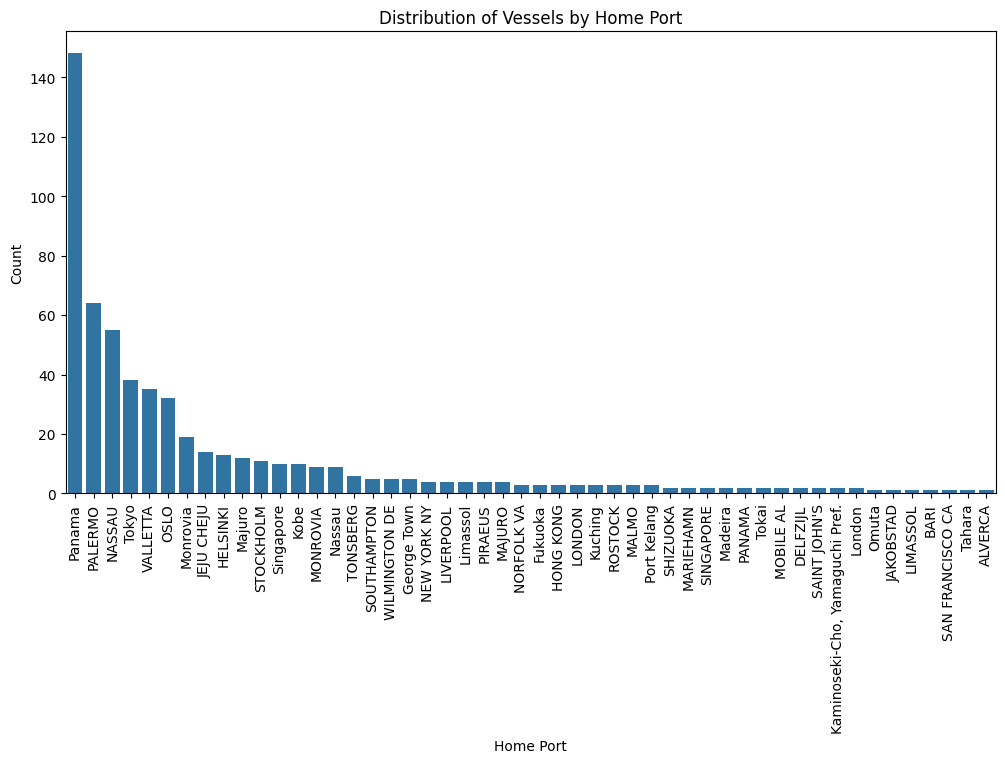

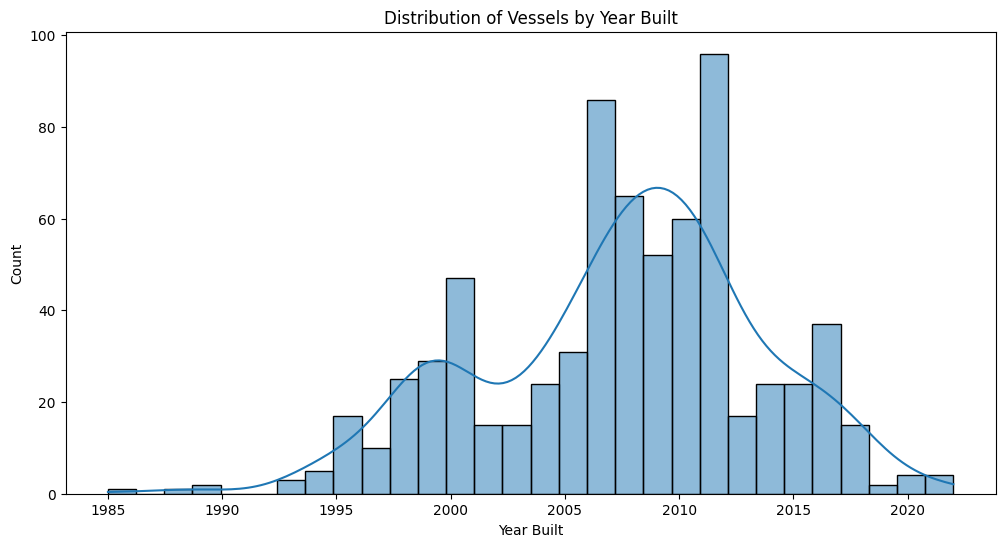

In [20]:
# Distribution of vessels by vesselType
plt.figure(figsize=(12, 6))
sns.countplot(data=vessels, x='vesselType')
plt.title('Distribution of Vessels by Type')
plt.xlabel('Vessel Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Distribution of vessels by shippingLineId
plt.figure(figsize=(12, 6))
sns.countplot(data=vessels, x='shippingLineId', order=vessels['shippingLineId'].value_counts().index)
plt.title('Distribution of Vessels by Shipping Line ID')
plt.xlabel('Shipping Line ID')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Distribution of vessels by homePort
plt.figure(figsize=(12, 6))
sns.countplot(data=vessels, x='homePort', order=vessels['homePort'].value_counts().index)
plt.title('Distribution of Vessels by Home Port')
plt.xlabel('Home Port')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Distribution of vessels by yearBuilt
plt.figure(figsize=(12, 6))
sns.histplot(data=vessels, x='yearBuilt', bins=30, kde=True)
plt.title('Distribution of Vessels by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.show()

### NAVSTAT
- 0: Under way using engine
- 1: At anchor 
- 5: Moored (refers to a vessel that is secured to a fixed object, such as a dock, pier, buoy, or anchor, and is stationary. When a ship is moored, it is not underway (not moving) and is usually tied up with ropes or cables, holding it in place at the port or a specific anchorage point.)

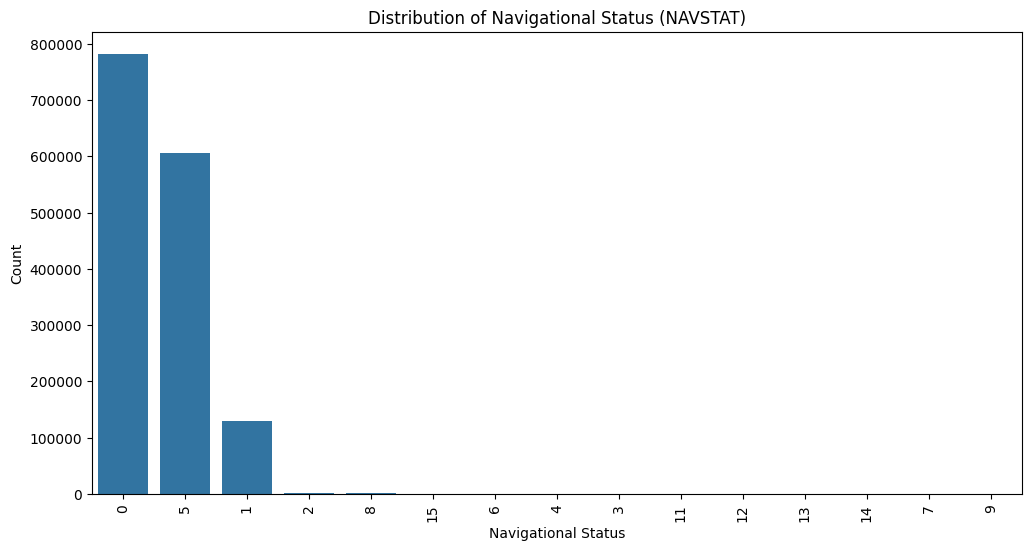

In [21]:
# Analyze the distribution of NAVSTAT (Navigational Status)
plt.figure(figsize=(12, 6))
sns.countplot(data=ais_train, x='navstat', order=ais_train['navstat'].value_counts().index)
plt.title('Distribution of Navigational Status (NAVSTAT)')
plt.xlabel('Navigational Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

   navstat        sog       rot         cog     heading
0        0  11.176109 -1.271817  197.603433  205.234621
1        1   0.171384 -0.520440  169.968239  181.023585
2        5   0.001395  0.000000  108.450698  245.800000


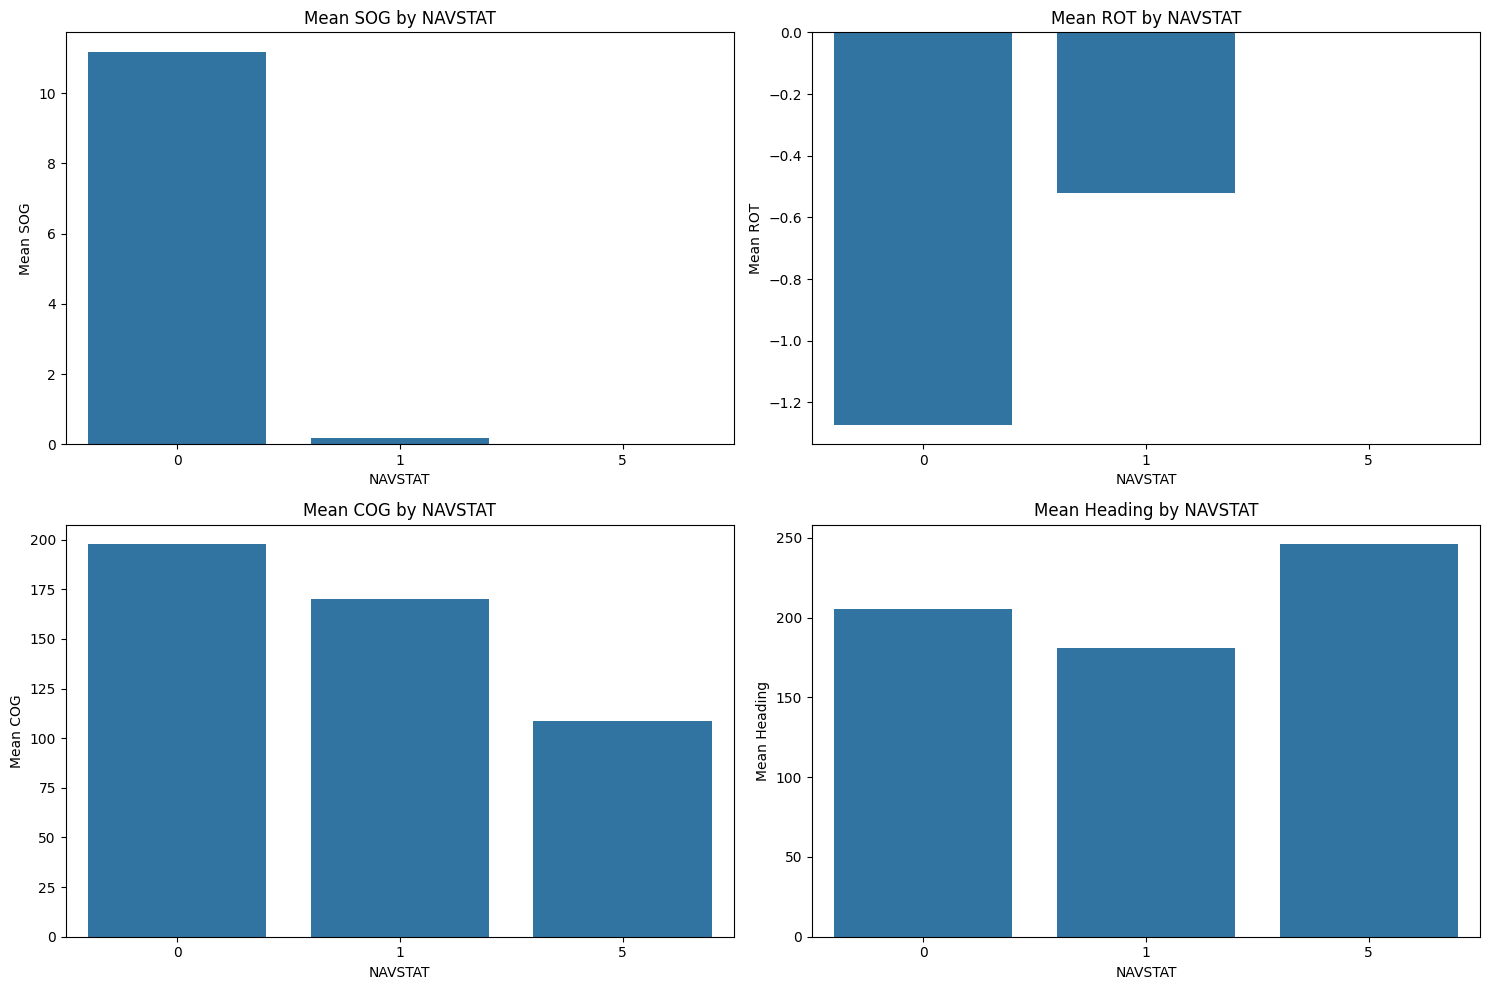

In [22]:
# Group by 'navstat' and calculate mean values for SOG, ROT, and other movement data
navstat_correlation = ais_train_vessel.groupby('navstat').agg({
    'sog': 'mean',
    'rot': 'mean',
    'cog': 'mean',
    'heading': 'mean'
}).reset_index()

print(navstat_correlation)

# Plot the correlation
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.barplot(data=navstat_correlation, x='navstat', y='sog', ax=axes[0, 0])
axes[0, 0].set_title('Mean SOG by NAVSTAT')
axes[0, 0].set_xlabel('NAVSTAT')
axes[0, 0].set_ylabel('Mean SOG')

sns.barplot(data=navstat_correlation, x='navstat', y='rot', ax=axes[0, 1])
axes[0, 1].set_title('Mean ROT by NAVSTAT')
axes[0, 1].set_xlabel('NAVSTAT')
axes[0, 1].set_ylabel('Mean ROT')

sns.barplot(data=navstat_correlation, x='navstat', y='cog', ax=axes[1, 0])
axes[1, 0].set_title('Mean COG by NAVSTAT')
axes[1, 0].set_xlabel('NAVSTAT')
axes[1, 0].set_ylabel('Mean COG')

sns.barplot(data=navstat_correlation, x='navstat', y='heading', ax=axes[1, 1])
axes[1, 1].set_title('Mean Heading by NAVSTAT')
axes[1, 1].set_xlabel('NAVSTAT')
axes[1, 1].set_ylabel('Mean Heading')

plt.tight_layout()
plt.show()